In [1]:
from linear_regression import LogisticRegression
from mlp import MLP
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:


transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = torchvision.datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


In [3]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms


trainset = torchvision.datasets.MNIST("PATH_TO_STORE_TRAINSET", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)


    1     5     4     4


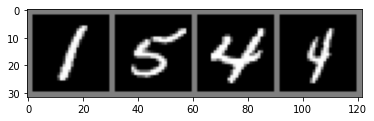

In [4]:
import matplotlib.pyplot as plt
import numpy as np

classes = [str(i) for i in range(10)]

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)
print(labels)

torch.Size([4, 1, 28, 28])
torch.Size([4])
tensor([9, 0, 4, 5])


In [6]:
model = LogisticRegression(28*28, 10)
images, labels = next(iter(trainloader))

#flatten
images = images.view(images.shape[0], -1)

print(model(images))

tensor([[0.3986, 0.6114, 0.5761, 0.3976, 0.3720, 0.5940, 0.6397, 0.4970, 0.4708,
         0.5029],
        [0.5272, 0.4051, 0.4924, 0.4249, 0.5458, 0.6381, 0.6465, 0.3315, 0.5728,
         0.5270],
        [0.5301, 0.4446, 0.4611, 0.4364, 0.5552, 0.6272, 0.5486, 0.4098, 0.3462,
         0.4597],
        [0.4753, 0.4158, 0.4612, 0.6202, 0.6769, 0.6139, 0.4623, 0.5366, 0.5379,
         0.5163]], grad_fn=<SigmoidBackward0>)


In [7]:
torch.cuda.device(1) == torch.cuda.device(1)


False

In [11]:
model = LogisticRegression(28*28, 10)
def loss_fn(outputs, labels):
    return torch.nn.functional.cross_entropy(outputs, labels)
cuda0 = torch.device('cuda')
cpu = torch.device('cpu')
model.to(cuda0)
def naive_loss_fn(outputs, labels):
    # convert labels to one-hot vectors
    one_hot = torch.zeros(len(labels), 10)
    for i in range(len(labels)):
        one_hot[i][labels[i]] = 1
    l = one_hot - outputs
    return torch.sum(l ** 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        #flatten images
        images = images.view(images.shape[0], -1)
        images = images.to(cuda0)
        labels = labels.to(cuda0)
        #clear gradients
        optimizer.zero_grad()

        #forward pass
        pred = model(images)

        #calculate loss
        loss = loss_fn(pred, labels)

        #backward pass
        loss.backward()

        #update parameters
        optimizer.step()

        running_loss += loss.item()
    print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(trainloader)))

    


Epoch 0 - Training loss: 1.5996966177622478
Epoch 1 - Training loss: 1.5708154283682505
Epoch 2 - Training loss: 1.56429823290507
Epoch 3 - Training loss: 1.5607922935167948
Epoch 4 - Training loss: 1.5576616052230199


In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print pred
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
images = images.view(images.shape[0], -1)
pred = model(images)
ap = torch.argmax(pred, dim=1)
print(pred)
print(ap)